# Cabofrio Buoy - Quality Control Analysis

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
# FOLDER PATH
folder_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'


# DATA RAW
raw_data_path = os.path.join(folder_path, 'pnboia_raw_data-renamed.csv')
buoys_df_raw = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# DATA SITE
raw_data_path = os.path.join(folder_path, 'pnboia_site_data-renamed.csv')
buoys_df_site = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_site['Datetime'] = pd.to_datetime(buoys_df_site['Datetime'])
buoys_df_site.set_index(['buoy','Datetime'], inplace=True)

# LIMITS
# Limits from pnboia_limits_tests.py
cabofrio_lims = pnboia_limits_tests.cabofrio

## Preliminary Filtering

- Filter bad period (> '2013-03')

In [4]:
# filter data with

cabofrio = filter_data(data=buoys_df_raw,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    outlier_check=False,
                    t_continuity_check=False)

cabofrio = cabofrio.drop(columns=cabofrio.filter(regex='dir|head|spread').columns)

# Remove bad period
cabofrio = cabofrio.loc[:'2013-03']

# Drop all-nans columns
cabofrio.dropna(how='all',axis=1, inplace=True)

mis_value_check done.
range_check done.


## Statistical Analysis

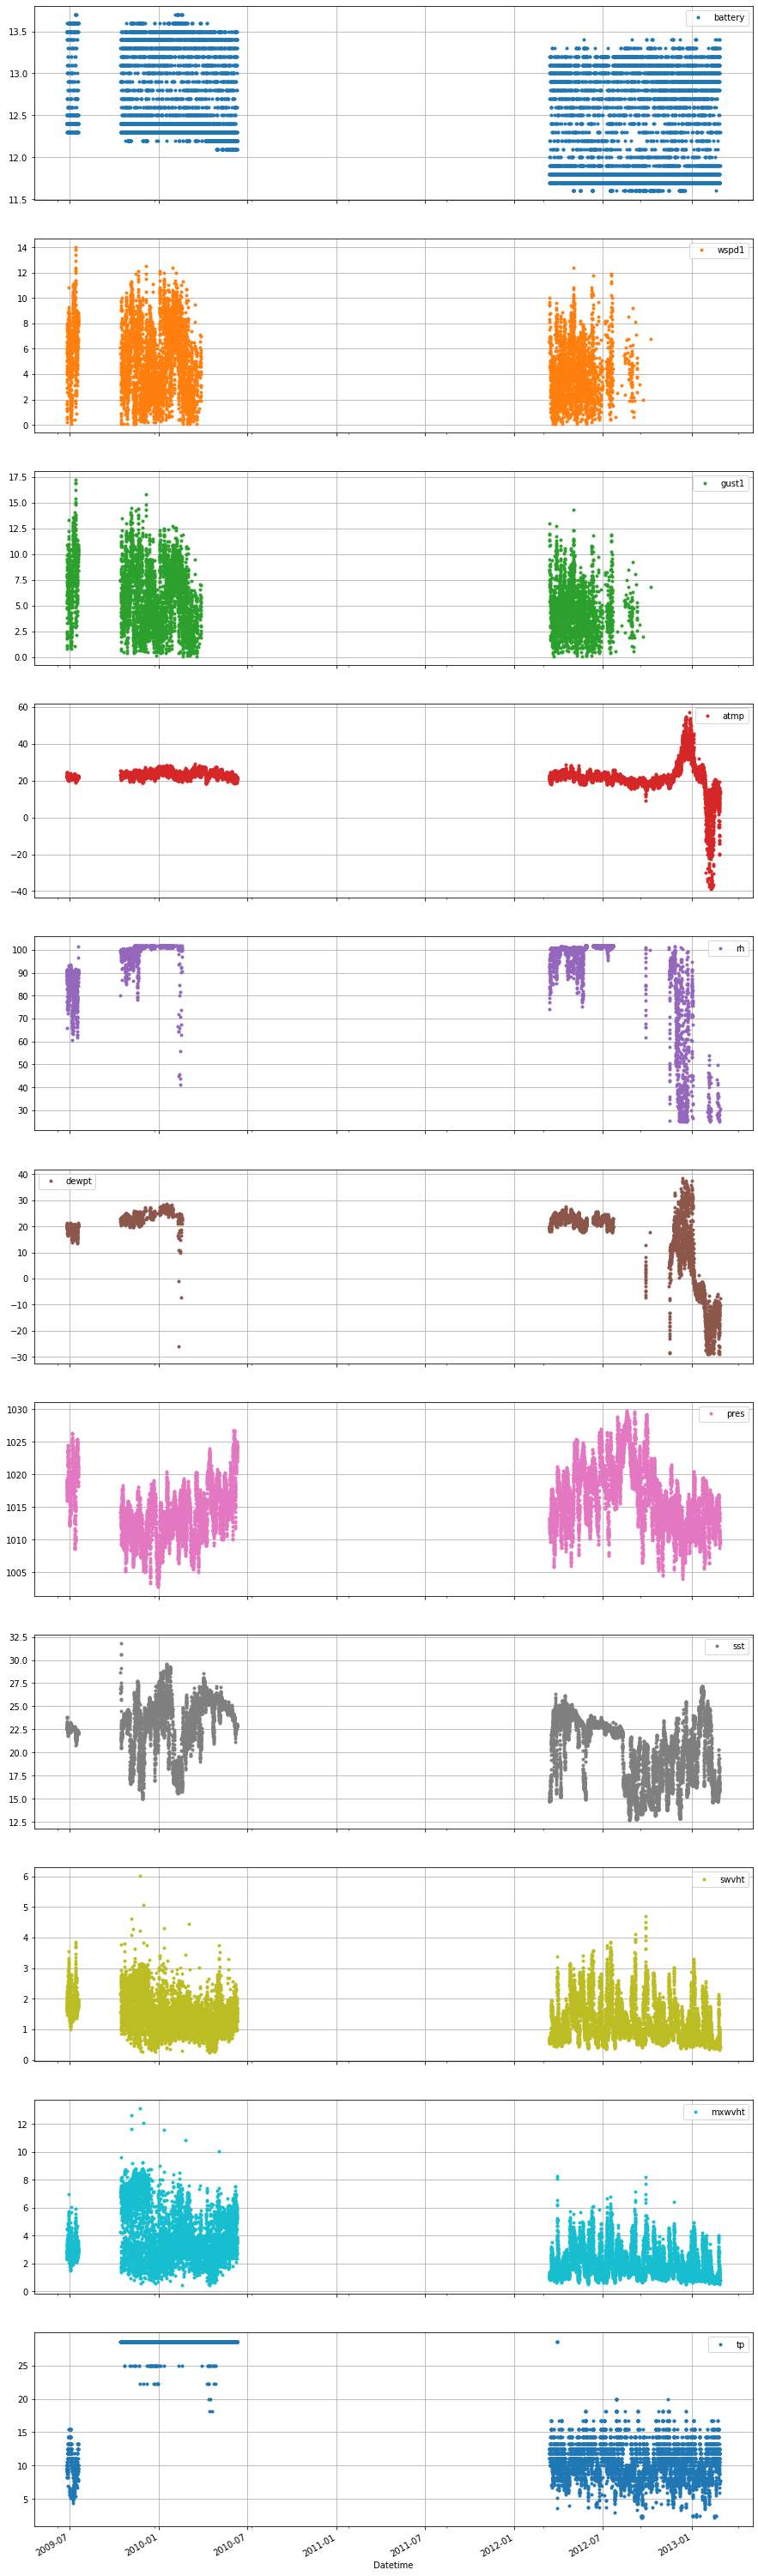

In [39]:
cabofrio.plot(subplots=True, marker='.', linestyle='None', grid=True,figsize=(15,60));

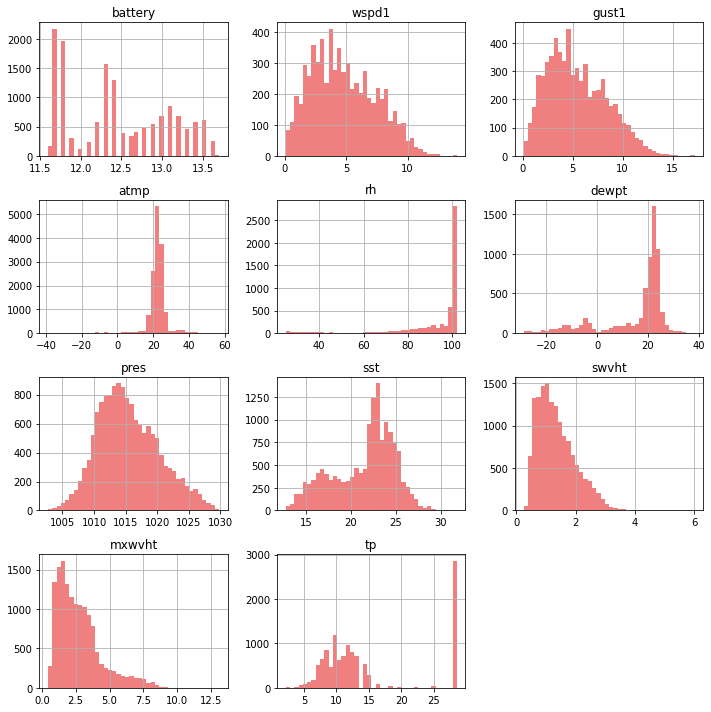

In [5]:
cabofrio.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

## Limits generation and data filtering

In [7]:
# Generated lims
cabofrio_out_lims_df_3 = gen_outlier_lim(cabofrio, buoy_name='cabofrio', std_factor=3).round(1)

# Generate lims dict
cabofrio_out_lims_dict_3 = manual_outlier_lims(cabofrio_out_lims_df_3, buoy_name='cabofrio')

# filter data with
cabofrio3 = filter_data(data=cabofrio,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=cabofrio_out_lims_dict_3)

outlier_check done.


In [8]:
# Generated lims
cabofrio_out_lims_df_5 = gen_outlier_lim(cabofrio, buoy_name='cabofrio', std_factor=5).round(1)

# Generate lims dict
cabofrio_out_lims_dict_5 = manual_outlier_lims(cabofrio_out_lims_df_5, buoy_name='cabofrio')

# filter data with
cabofrio2 = filter_data(data=cabofrio,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=cabofrio_out_lims_dict_5)

outlier_check done.


In [9]:
cabofrio_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,4.8,2.6,3.0,7.8,0.0,12.6
gust1,5.5,2.9,3.0,8.8,0.0,14.3
atmp,22.2,6.7,3.0,20.1,2.1,42.3
rh,91.7,17.3,3.0,51.9,39.8,143.7
dewpt,15.5,12.9,3.0,38.8,0.0,54.2
pres,1015.5,4.8,3.0,14.5,1000.9,1030.0
sst,21.5,3.4,3.0,10.3,11.1,31.8
swvht,1.4,0.6,3.0,1.9,0.0,3.3
mxwvht,2.8,1.7,3.0,5.0,0.0,7.7


In [10]:
cabofrio_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,4.8,2.6,5.0,13.0,0.0,17.8
gust1,5.5,2.9,5.0,14.7,0.0,20.2
atmp,22.2,6.7,5.0,33.5,0.0,55.7
rh,91.7,17.3,5.0,86.6,5.1,178.3
dewpt,15.5,12.9,5.0,64.6,0.0,80.1
pres,1015.5,4.8,5.0,24.2,991.2,1039.7
sst,21.5,3.4,5.0,17.2,4.2,38.7
swvht,1.4,0.6,5.0,3.2,0.0,4.6
mxwvht,2.8,1.7,5.0,8.3,0.0,11.0


# Testing generated limits

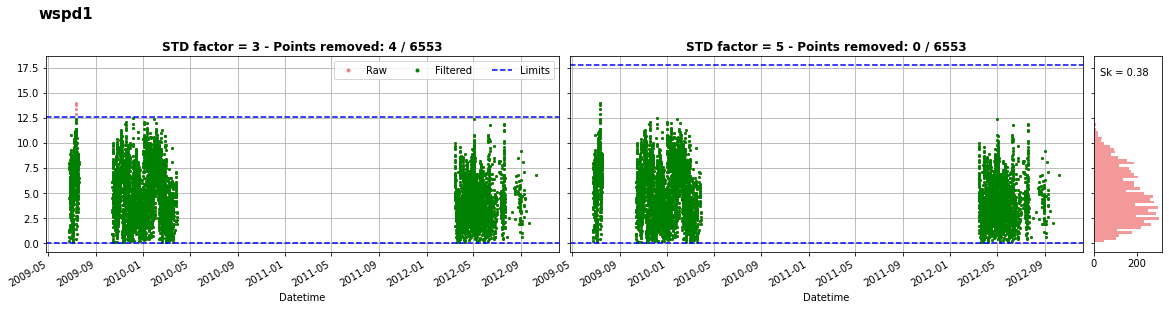

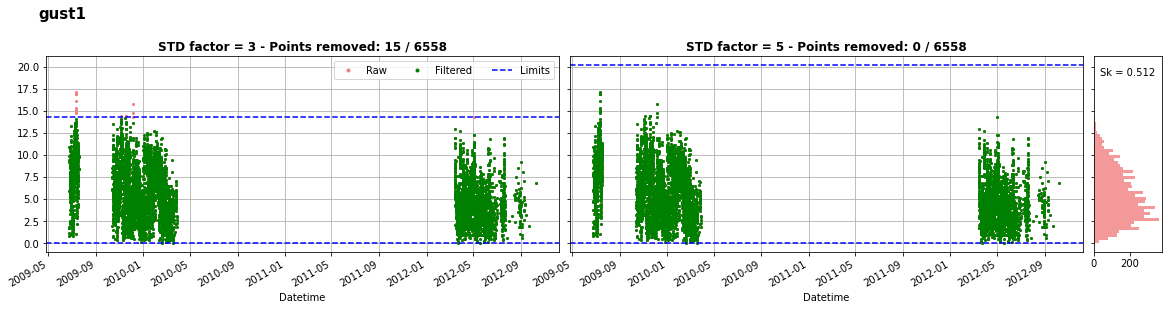

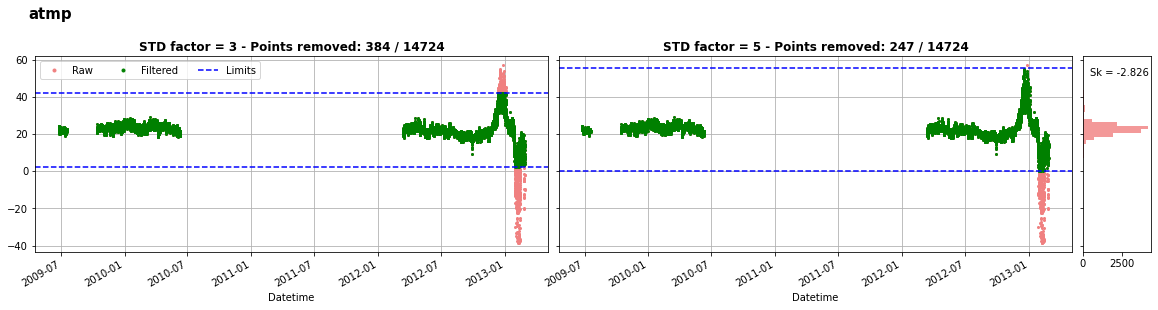

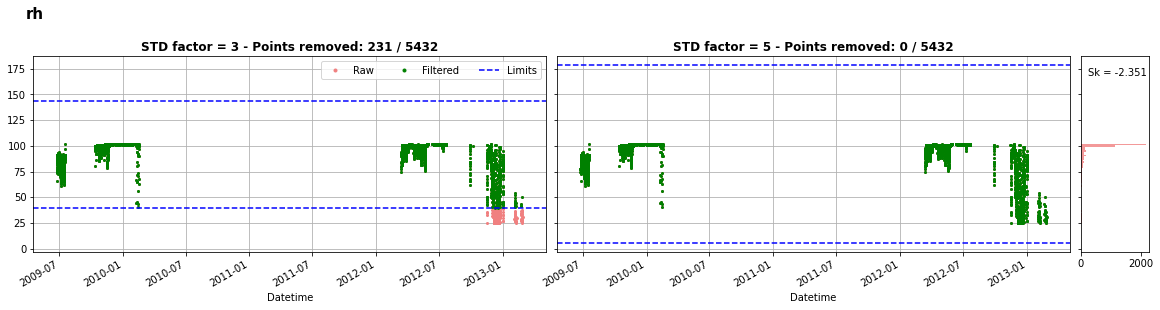

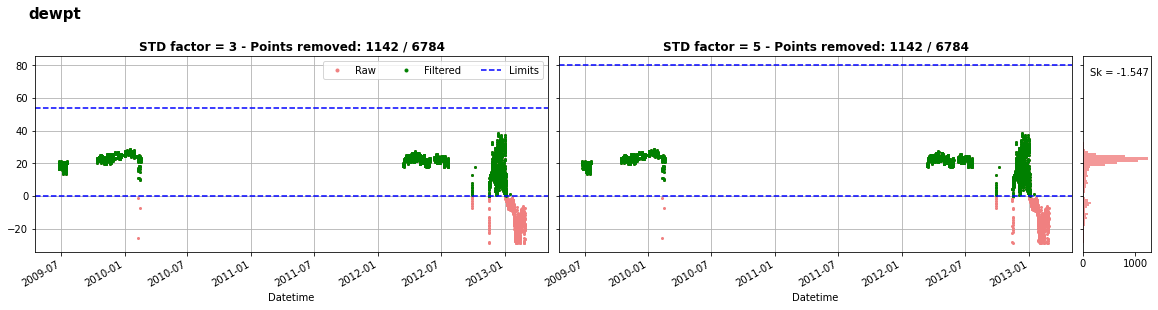

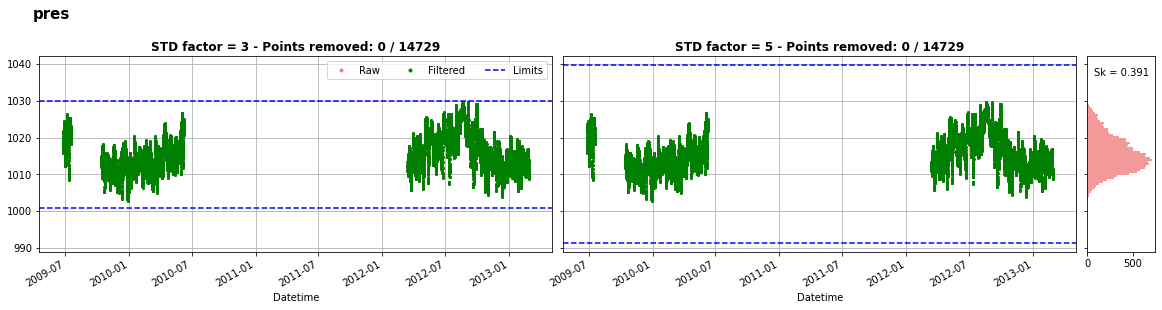

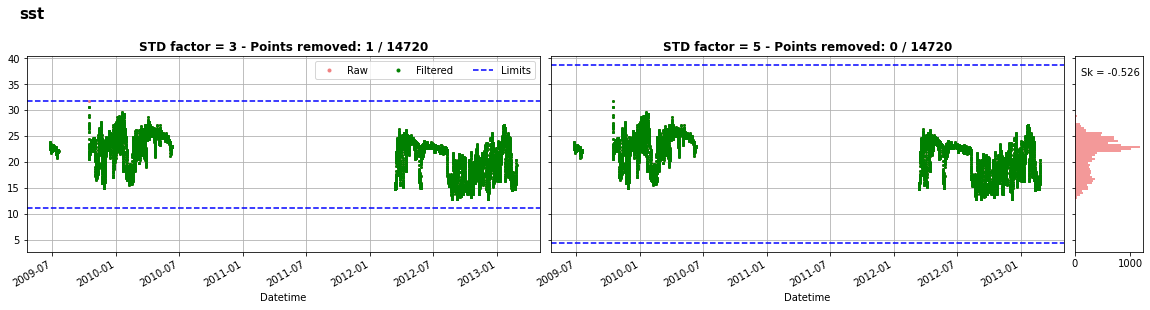

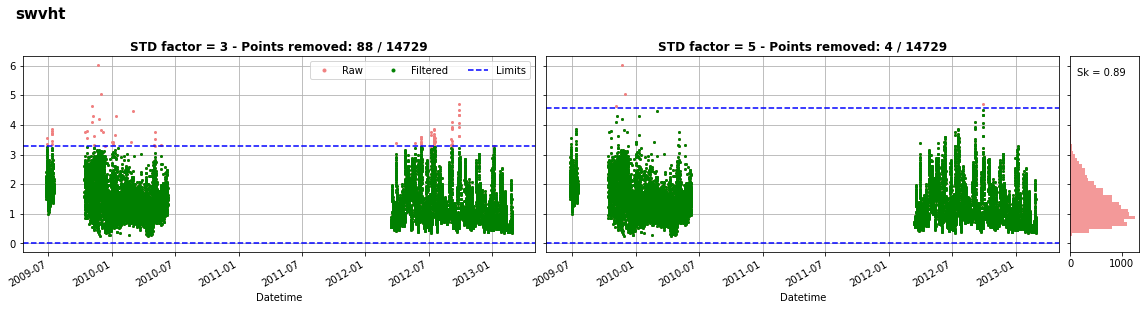

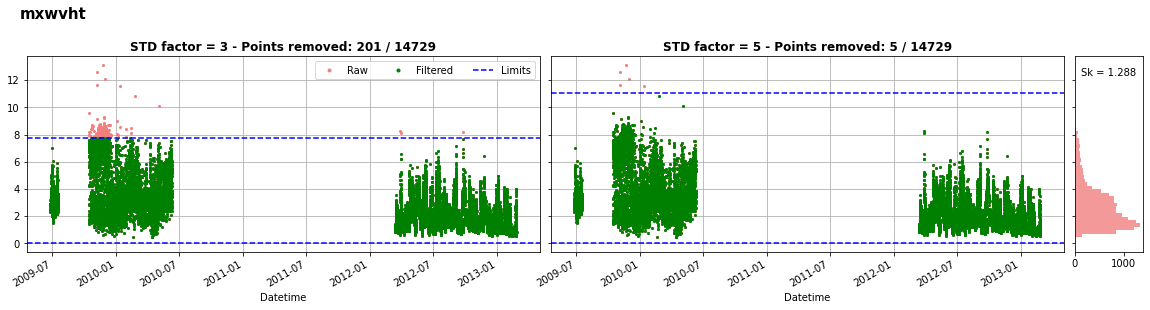

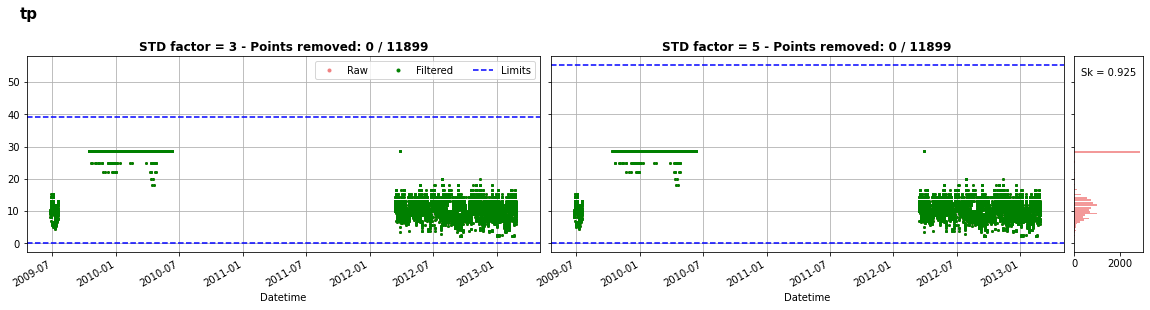

In [12]:
parameters = cabofrio.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=cabofrio,
                    limits=cabofrio_lims,
                    buoy='cabofrio',
                    parameter=param)
    plt.show()

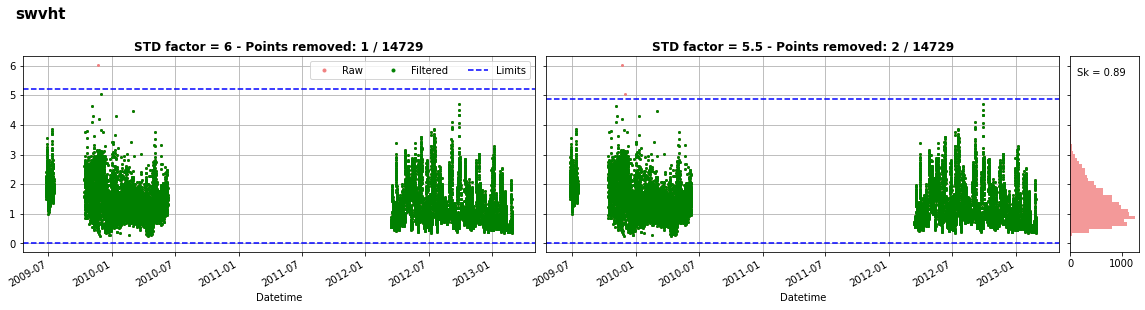

In [34]:
param = 'swvht'
plot_comparison(factor1=6, 
                    factor2=5.5, 
                    data=cabofrio,
                    limits=cabofrio_lims,
                    buoy='cabofrio',
                    parameter=param)
plt.show()

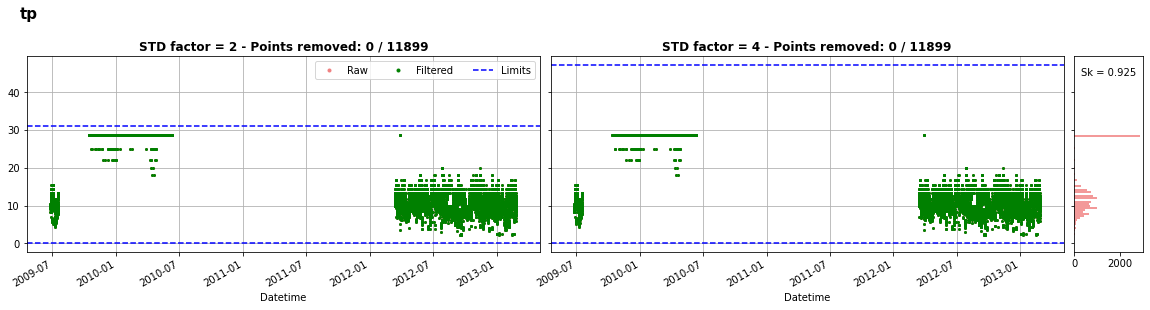

In [41]:
param = 'tp'
plot_comparison(factor1=2, 
                    factor2=4, 
                    data=cabofrio,
                    limits=cabofrio_lims,
                    buoy='cabofrio',
                    parameter=param)
plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

In [43]:
factors = {'wspd1': 4,
            'gust1': 5,
            'atmp': 6,
            'rh': 2,
            'dewpt': 2,
            'pres': 3.5,
            'sst': 3,
            'swvht': 5.5,
            'mxwvht': 5.8,
            'tp': 2}

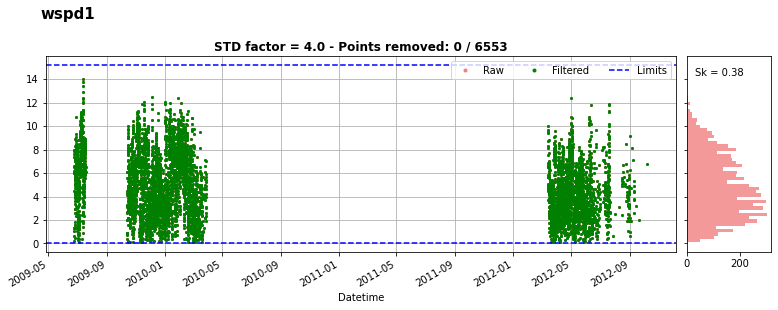

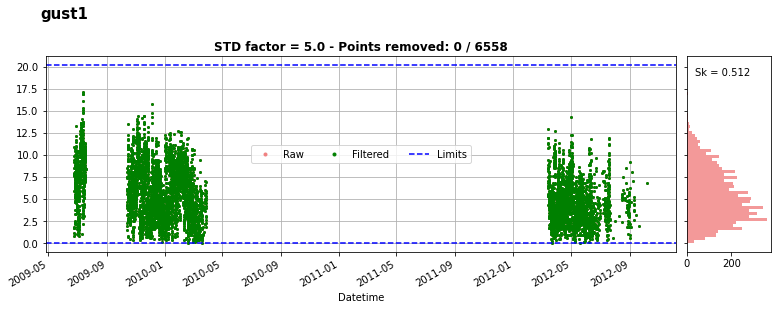

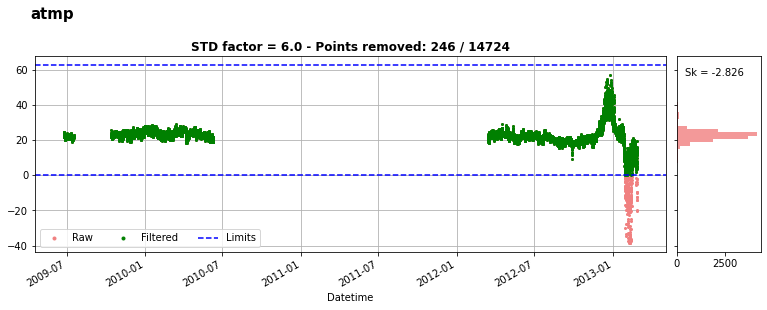

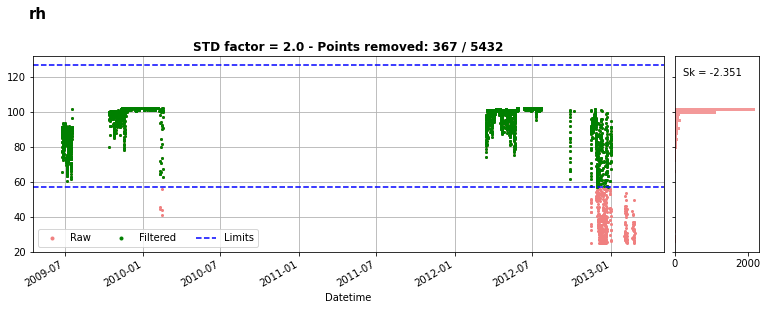

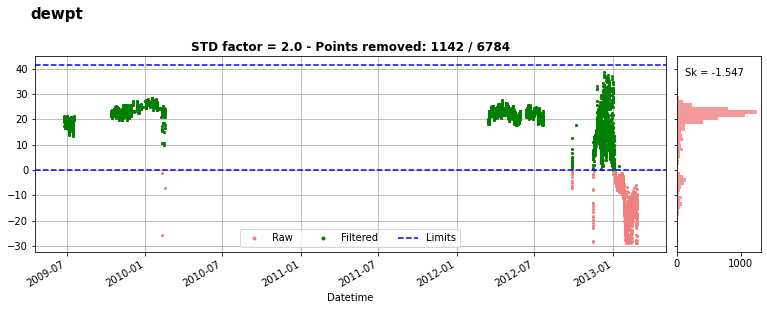

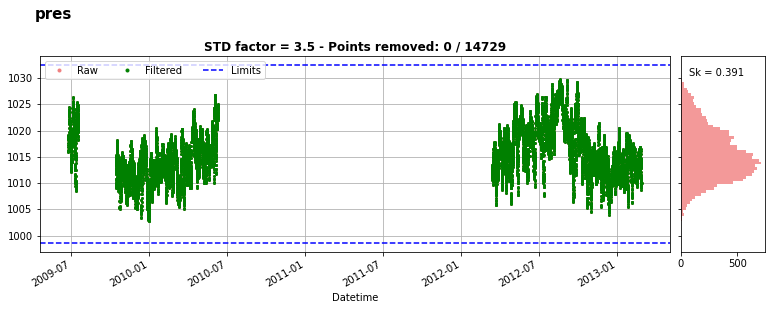

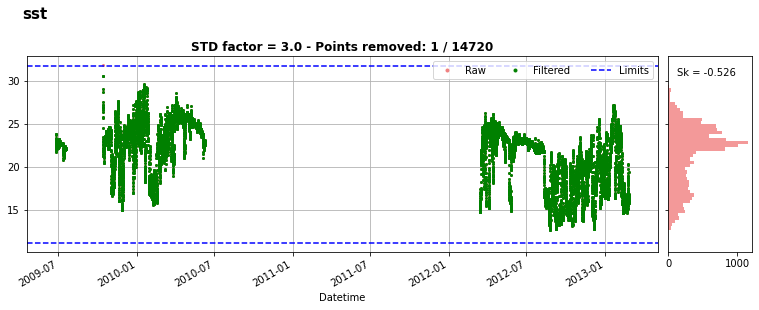

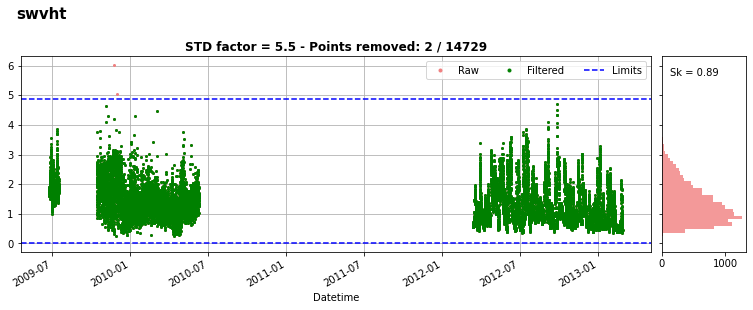

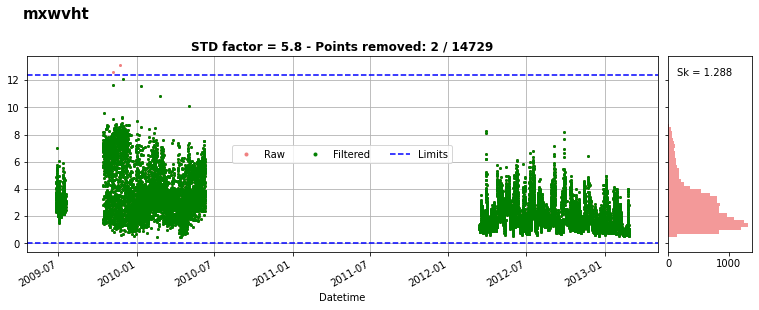

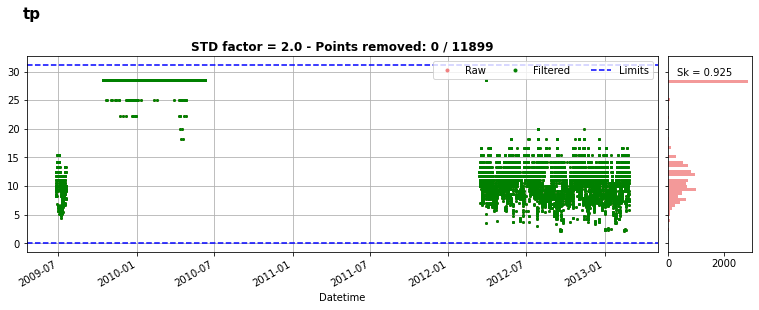

In [44]:
# FILTERING WITH DEFINITIVE FACTORS
cabofrio_notdir = cabofrio.drop(columns=cabofrio.filter(regex='dir|head|spread').columns)
parameters = cabofrio_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=cabofrio,
                    limits=cabofrio_lims,
                    buoy='cabofrio',
                    parameter=param)
    plt.show()

In [45]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS FOR SANTOS BUOY

factors = {'wspd1': 4,
            'gust1': 5,
            'atmp': 6,
            'rh': 2,
            'dewpt': 2,
            'pres': 3.5,
            'sst': 3,
            'swvht': 5.5,
            'mxwvht': 5.8,
            'tp': 2}

cabofrio_out_lims_df = gen_outlier_lim(data=cabofrio,
                                     buoy_name='cabofrio',
                                     std_factor=factors).round(1)

In [47]:
cabofrio_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,4.8,2.6,4.0,10.4,0.0,15.2
gust1,5.5,2.9,5.0,14.7,0.0,20.2
atmp,22.2,6.7,6.0,40.2,0.0,62.4
rh,91.7,17.3,2.0,34.6,57.1,126.3
dewpt,15.5,12.9,2.0,25.8,0.0,41.3
pres,1015.5,4.8,3.5,17.0,998.5,1032.4
sst,21.5,3.4,3.0,10.3,11.1,31.8
swvht,1.4,0.6,5.5,3.5,0.0,4.9
mxwvht,2.8,1.7,5.8,9.6,0.0,12.4


In [48]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS FOR SANTOS BUOY
cabofrio_out_lims_dict = manual_outlier_lims(cabofrio_out_lims_df, buoy_name='cabofrio')

In [49]:
cabofrio_out_lims_dict

{'wspd1': [0.0, 15.2],
 'gust1': [0.0, 20.2],
 'atmp': [0.0, 62.4],
 'rh': [57.1, 126.3],
 'dewpt': [0.0, 41.3],
 'pres': [998.5, 1032.4],
 'sst': [11.1, 31.8],
 'swvht': [0.0, 4.9],
 'mxwvht': [0.0, 12.4],
 'tp': [0.0, 31.1]}

In [50]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
cabofrio_definitive = filter_data(data=buoys_df_raw,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=cabofrio_out_lims_dict)

outlier_check done.
